<a href="https://colab.research.google.com/github/ppseguel/r_quicktutorial/blob/main/R_tutorial_forStataUser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#R Tutorial for a Stata User
1. Introduction
R is an open-source programming language for statistical analysis and visualization. RStudio is the most commonly used integrated development environment (IDE) for R, providing a user-friendly interface.

2. Installing R and RStudio
Install R from CRAN.
Install RStudio.
3. Reading a Database
In Stata, you may be familiar with using import delimited or use to read data. In R, you use the read.csv or read.table functions.

In [ ]:
data <- read.csv("path/to/your/datafile.csv")

4. Basic Data Manipulation
If you're used to summarize in Stata, the equivalent in R is the summary function.



In [ ]:
summary(data)


For filtering data (similar to Stata's keep if):

In [ ]:
filtered_data <- subset(data, condition_here)


5. Descriptive Statistics
For means, standard deviations, etc., you can use:

In [ ]:
mean(data$variable_name)
sd(data$variable_name)


6. Introduction to ggplot2 for Plotting
First, you need to install and load the ggplot2 package:

In [ ]:
install.packages("ggplot2")
library(ggplot2)

Plotting a histogram:



In [ ]:
ggplot(data, aes(x=variable_name)) +
  geom_histogram(binwidth=bin_size_here, fill="color_here", color="border_color_here") +
  labs(title="Your Title", x="X Axis Label", y="Y Axis Label")


Scatterplot:



In [ ]:
ggplot(data, aes(x=variable1_name, y=variable2_name)) +
  geom_point() +
  labs(title="Your Title", x="X Axis Label", y="Y Axis Label")


7. Conclusion
This tutorial is a concise introduction. As you dive deeper into R, you'll discover its richness and flexibility, especially with the vast array of packages available for various tasks. With your background in social statistics and experience with Stata, you'll find many parallels, making your transition smoother.

Remember, while syntax and certain processes may differ, the underlying statistical principles remain the same. Enjoy your journey into R!

Note: Adjust the tutorial according to the specific needs of your audience. The above is a basic introduction to get started, but R's capabilities extend far beyond what's mentioned here.

Using dplyr in R
1. Installing and Loading the dplyr Package
If you haven't already installed it, you can do so with:

In [ ]:
install.packages("dplyr")


2. Basic Data Manipulation with dplyr
Here's a quick introduction to some of the primary verbs (functions) in dplyr:

filter() - for subsetting rows.

In [ ]:
# Filtering data where some_condition is met
filtered_data <- data %>% filter(some_condition)


select() - for selecting columns.



In [ ]:
# Selecting specific columns
selected_data <- data %>% select(column1, column2, ...)


mutate() - for adding or modifying columns.



In [ ]:
# Creating a new column 'new_column' based on some calculations
mutated_data <- data %>% mutate(new_column = column1 + column2)


arrange() - for sorting rows.



In [ ]:
# Arranging data by 'column1'
arranged_data <- data %>% arrange(column1)


3. Grouped Operations with dplyr
Often in social statistics, you want to compute statistics grouped by categories. Here's how you can use dplyr to achieve this:

group_by() and summarise() - for grouped operations.

In [ ]:
# Calculating mean of 'numeric_column' grouped by 'categorical_column'
grouped_stats <- data %>%
  group_by(categorical_column) %>%
  summarise(mean_value = mean(numeric_column, na.rm = TRUE))


he code above first groups the data by categorical_column and then calculates the mean of numeric_column for each group. The result will be a new dataframe (grouped_stats) with each unique value of categorical_column and the corresponding mean of numeric_column.

You can further add more statistics, like standard deviation, by adding lines inside the summarise() function:

In [ ]:
grouped_stats <- data %>%
  group_by(categorical_column) %>%
  summarise(
    mean_value = mean(numeric_column, na.rm = TRUE),
    sd_value = sd(numeric_column, na.rm = TRUE)
  )


. Conclusion
The dplyr package greatly simplifies data manipulation tasks in R, making it a must-know for anyone doing data analysis in the language. Combined with ggplot2, these tools empower users to perform a comprehensive exploratory data analysis with ease.

Remember, this is just a brief introduction to dplyr. The package has many more capabilities and functions that allow for complex data manipulations. As you become more familiar with R and dplyr, you'll discover the depth of what's possible.

#Example

Let's craft a small dataset and walk through an example analyzing customer sales by country and identifying top sellers.

1. Creating a Sample Dataset
For our analysis, we'll assume we have a dataset with three columns: CustomerName, Country, and Sales

In [1]:
# Sample dataset
data <- data.frame(
  CustomerName = c('Alice', 'Bob', 'Charlie', 'David', 'Eve', 'Frank', 'Grace', 'Hannah', 'Ivan', 'Jack'),
  Country = c('USA', 'UK', 'USA', 'Canada', 'UK', 'Canada', 'USA', 'UK', 'Canada', 'USA'),
  Sales = c(100, 150, 200, 120, 180, 210, 190, 170, 140, 110)
)


2. Analyzing Sales by Country with dplyr
To find out the total sales by country:

In [2]:
library(dplyr)

sales_by_country <- data %>%
  group_by(Country) %>%
  summarise(TotalSales = sum(Sales))

print(sales_by_country)



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




# A tibble: 3 × 2
  Country TotalSales
  <chr>        <dbl>
1 Canada         470
2 UK             500
3 USA            600


3. Identifying Top Sellers
Let's say we want to identify the top 3 sellers:



In [3]:
top_sellers <- data %>%
  arrange(desc(Sales)) %>%
  head(3)

print(top_sellers)


  CustomerName Country Sales
1        Frank  Canada   210
2      Charlie     USA   200
3        Grace     USA   190


4. Visualization with ggplot2
To visualize total sales by country:

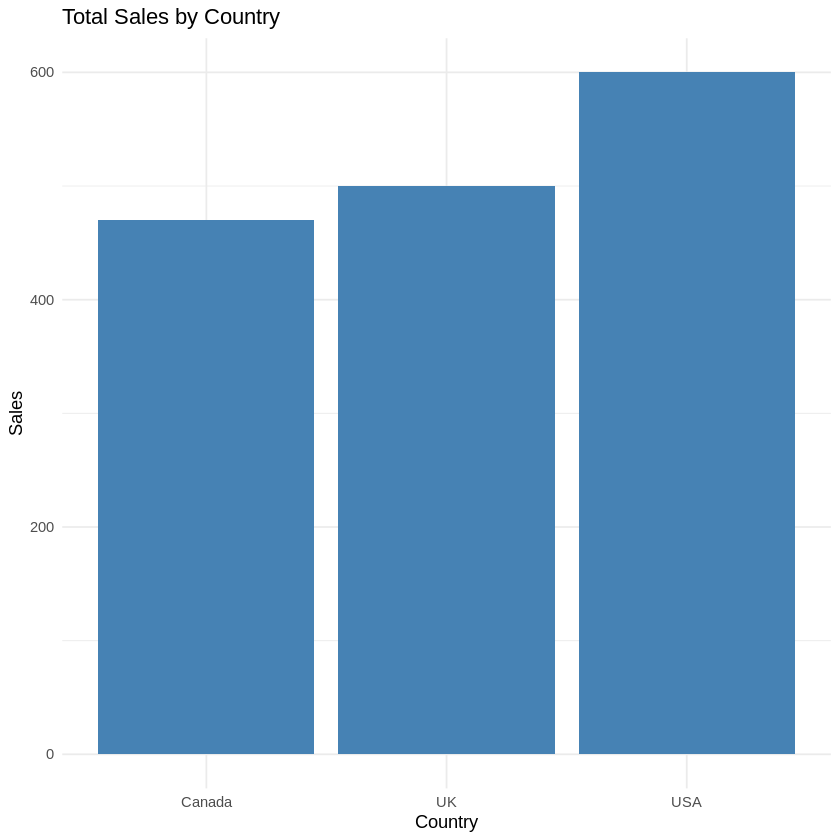

In [4]:
library(ggplot2)

ggplot(sales_by_country, aes(x=Country, y=TotalSales)) +
  geom_bar(stat="identity", fill="steelblue") +
  labs(title="Total Sales by Country", x="Country", y="Sales") +
  theme_minimal()


To visualize individual customer sales and highlight the top 3 sellers:



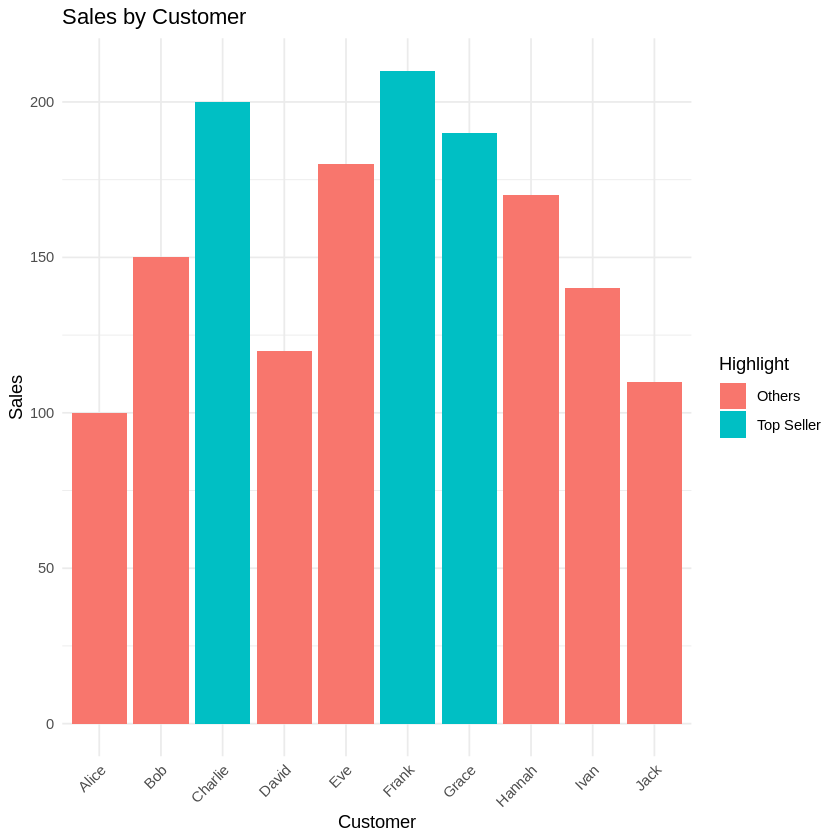

In [5]:
data$Highlight <- ifelse(data$CustomerName %in% top_sellers$CustomerName, "Top Seller", "Others")

ggplot(data, aes(x=CustomerName, y=Sales, fill=Highlight)) +
  geom_bar(stat="identity") +
  labs(title="Sales by Customer", x="Customer", y="Sales") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


This second plot uses color to differentiate between the top sellers and the others. The top sellers are highlighted with a different color for easy identification.